# Coffee Shop Revenue Prediction
## Complete ML Pipeline: EDA → Training → Prediction

**Dataset**: coffee_shop_revenue1.csv (2,000 rows)

**Goal**: Predict daily revenue based on 6 operational features

## 1. Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Data

In [23]:
# Load dataset
df = pd.read_csv('coffee_shop_revenue1.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns:")
print(df.columns.tolist())

# Display first few rows
df.head()

Dataset shape: (2000, 7)

Columns:
['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue']


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Information

In [24]:
# Data info
print("Data Types:")
print(df.dtypes)
print("\n" + "="*60)

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*60)

# Basic statistics
print("\nBasic Statistics:")
df.describe()

Data Types:
Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


Missing Values:
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


Basic Statistics:


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


### 3.2 Target Variable Analysis

In [25]:
print("Daily Revenue Statistics:")
print(f"Mean:   ${df['Daily_Revenue'].mean():.2f}")
print(f"Median: ${df['Daily_Revenue'].median():.2f}")
print(f"Std:    ${df['Daily_Revenue'].std():.2f}")
print(f"Min:    ${df['Daily_Revenue'].min():.2f}")
print(f"Max:    ${df['Daily_Revenue'].max():.2f}")
print(f"Range:  ${df['Daily_Revenue'].max() - df['Daily_Revenue'].min():.2f}")

Daily Revenue Statistics:
Mean:   $1917.33
Median: $1770.78
Std:    $976.20
Min:    $-58.95
Max:    $5114.60
Range:  $5173.55


### 3.3 Correlation Analysis

In [26]:
# Correlation with target
correlations = df.corr()['Daily_Revenue'].sort_values(ascending=False)
print("Correlation with Daily_Revenue:")
print(correlations)

# Top 3 features
print("\n" + "="*60)
print("Top 3 Most Important Features:")
top_features = correlations[1:4]  # Exclude self-correlation
for i, (feature, corr) in enumerate(top_features.items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")

Correlation with Daily_Revenue:
Daily_Revenue                  1.000000
Number_of_Customers_Per_Day    0.736461
Average_Order_Value            0.535694
Marketing_Spend_Per_Day        0.254812
Location_Foot_Traffic          0.013469
Number_of_Employees            0.003295
Operating_Hours_Per_Day       -0.005323
Name: Daily_Revenue, dtype: float64

Top 3 Most Important Features:
1. Number_of_Customers_Per_Day: 0.7365
2. Average_Order_Value: 0.5357
3. Marketing_Spend_Per_Day: 0.2548


### 3.4 Visualizations

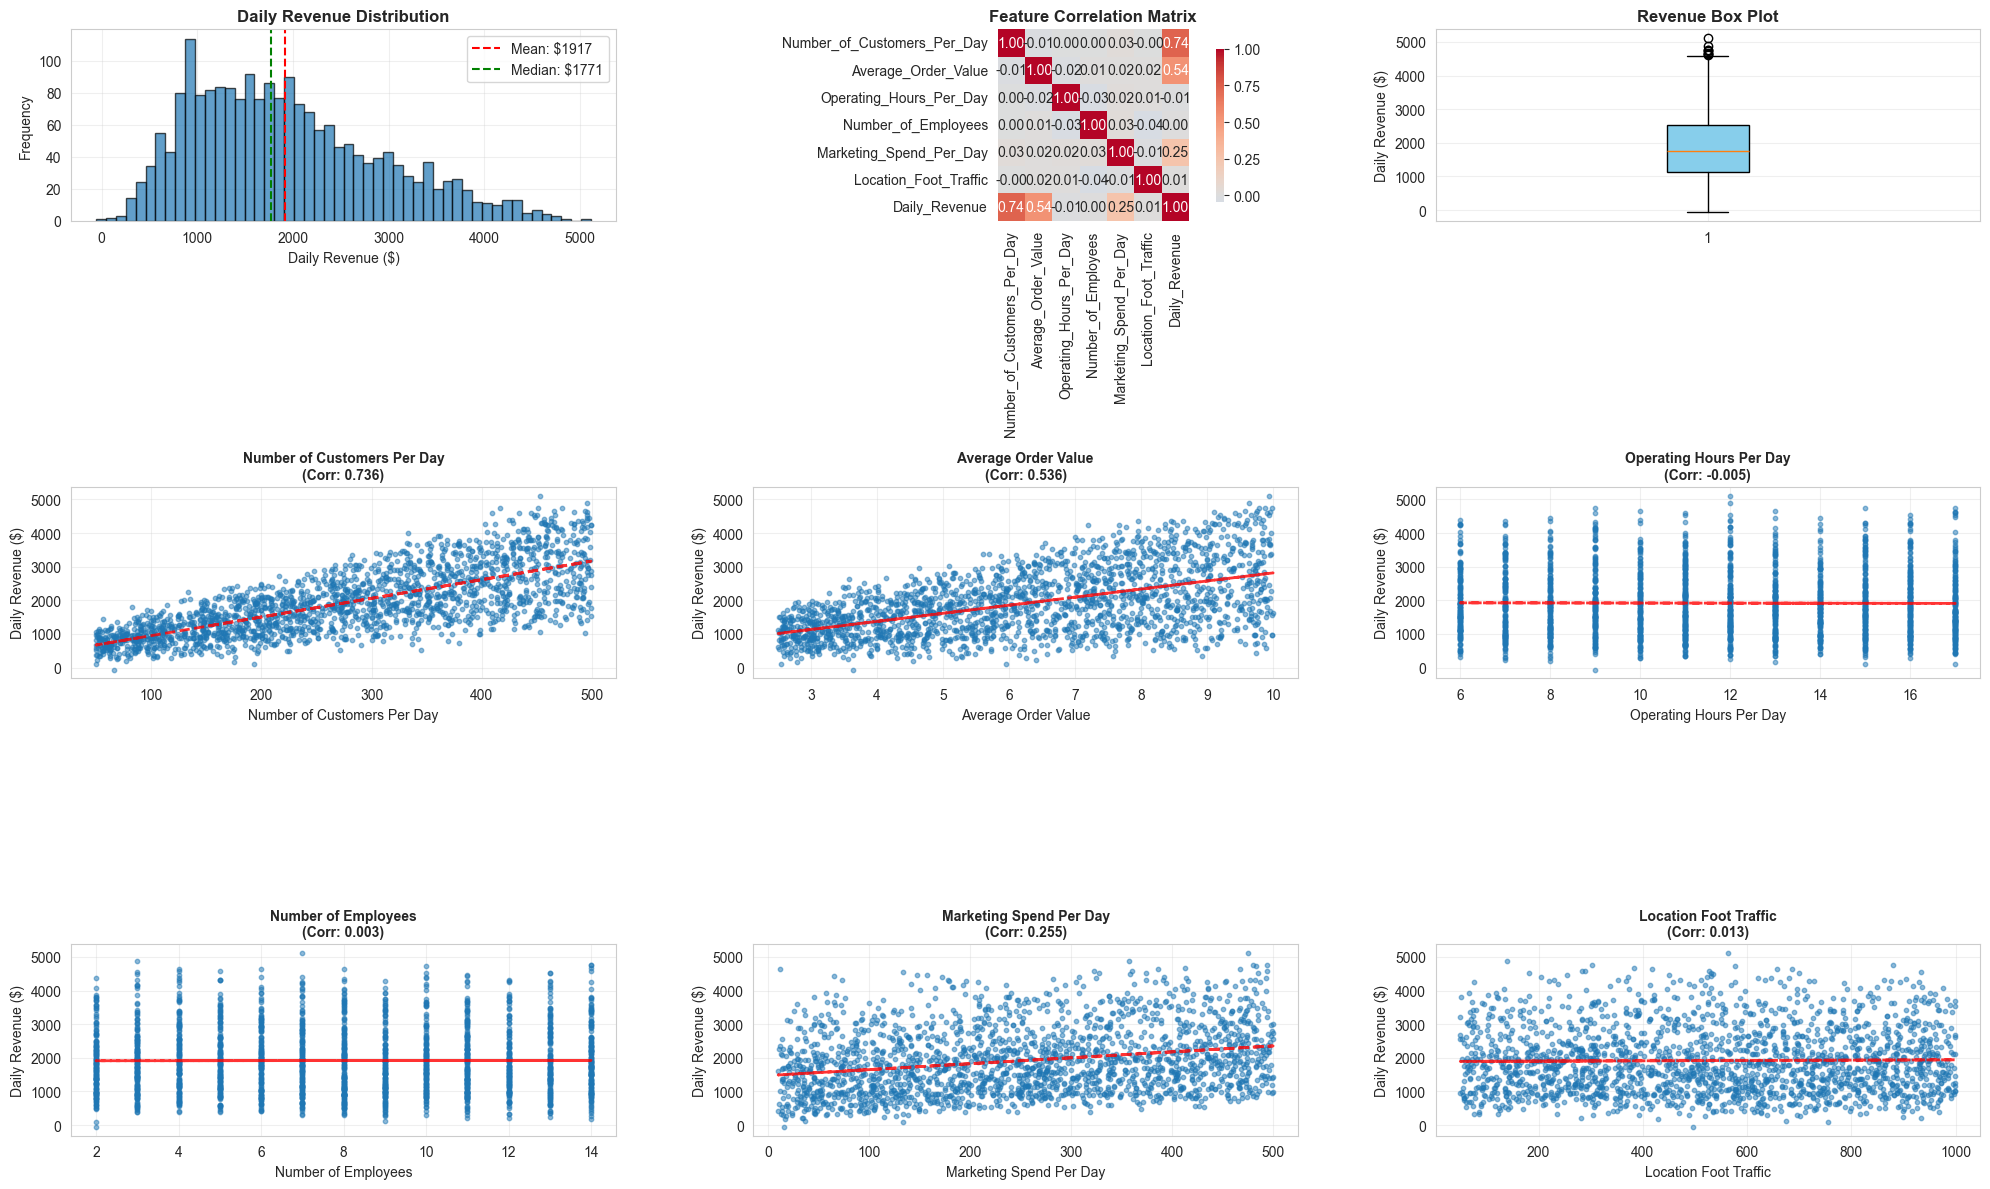

✓ EDA visualizations created


In [27]:
# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Revenue Distribution
ax1 = plt.subplot(3, 3, 1)
df['Daily_Revenue'].hist(bins=50, edgecolor='black', alpha=0.7)
ax1.axvline(df['Daily_Revenue'].mean(), color='r', linestyle='--', 
            label=f'Mean: ${df["Daily_Revenue"].mean():.0f}')
ax1.axvline(df['Daily_Revenue'].median(), color='g', linestyle='--', 
            label=f'Median: ${df["Daily_Revenue"].median():.0f}')
ax1.set_title('Daily Revenue Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Daily Revenue ($)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Correlation Heatmap
ax2 = plt.subplot(3, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')

# 3. Box Plot
ax3 = plt.subplot(3, 3, 3)
bp = ax3.boxplot(df['Daily_Revenue'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('skyblue')
ax3.set_ylabel('Daily Revenue ($)')
ax3.set_title('Revenue Box Plot', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4-9. Scatter plots for each feature
features = [col for col in df.columns if col != 'Daily_Revenue']
for idx, feature in enumerate(features, start=4):
    ax = plt.subplot(3, 3, idx)
    ax.scatter(df[feature], df['Daily_Revenue'], alpha=0.5, s=10)
    
    # Add trend line
    z = np.polyfit(df[feature], df['Daily_Revenue'], 1)
    p = np.poly1d(z)
    ax.plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
    
    # Get correlation
    corr = df[feature].corr(df['Daily_Revenue'])
    ax.set_xlabel(feature.replace('_', ' '))
    ax.set_ylabel('Daily Revenue ($)')
    ax.set_title(f'{feature.replace("_", " ")}\n(Corr: {corr:.3f})', 
                fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/eda_comprehensive.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ EDA visualizations created")

### 3.5 Outlier Detection

In [28]:
# Check for outliers using IQR method
Q1 = df['Daily_Revenue'].quantile(0.25)
Q3 = df['Daily_Revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Daily_Revenue'] < Q1 - 1.5*IQR) | (df['Daily_Revenue'] > Q3 + 1.5*IQR)]

print(f"Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"\nOutlier range: ${outliers['Daily_Revenue'].min():.2f} to ${outliers['Daily_Revenue'].max():.2f}")

Outliers detected: 9 (0.45%)

Outlier range: $4626.59 to $5114.60


## 4. Data Preparation

In [29]:
# Separate features and target
X = df.drop('Daily_Revenue', axis=1)
y = df['Daily_Revenue']

feature_names = X.columns.tolist()

print(f"Features ({len(feature_names)}):")
for i, feat in enumerate(feature_names, 1):
    print(f"  {i}. {feat}")

print(f"\nTarget: Daily_Revenue")
print(f"Shape: X={X.shape}, y={y.shape}")

Features (6):
  1. Number_of_Customers_Per_Day
  2. Average_Order_Value
  3. Operating_Hours_Per_Day
  4. Number_of_Employees
  5. Marketing_Spend_Per_Day
  6. Location_Foot_Traffic

Target: Daily_Revenue
Shape: X=(2000, 6), y=(2000,)


## 5. Train-Test Split

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train set: {len(X_train)} samples")
print(f"Test set:  {len(X_test)} samples")
print(f"\nTrain revenue: ${y_train.mean():.2f} ± ${y_train.std():.2f}")
print(f"Test revenue:  ${y_test.mean():.2f} ± ${y_test.std():.2f}")

Train set: 1600 samples
Test set:  400 samples

Train revenue: $1920.47 ± $978.56
Test revenue:  $1904.76 ± $967.84


## 6. Feature Scaling

In [31]:
# Scale features (for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✓ Features scaled")
print("✓ Scaler saved to models/scaler.pkl")

✓ Features scaled
✓ Scaler saved to models/scaler.pkl


## 7. Model Training

### 7.1 Linear Regression

In [32]:
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression Results:")
print(f"  MAE:  ${mae_lr:.2f}")
print(f"  RMSE: ${rmse_lr:.2f}")
print(f"  MAPE: {mape_lr:.2f}%")
print(f"  R²:   {r2_lr:.4f}")

Training Linear Regression...

Linear Regression Results:
  MAE:  $244.21
  RMSE: $312.36
  MAPE: 19.42%
  R²:   0.8956


### 7.2 Random Forest

In [33]:
print("Training Random Forest...")
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Results:")
print(f"  MAE:  ${mae_rf:.2f}")
print(f"  RMSE: ${rmse_rf:.2f}")
print(f"  MAPE: {mape_rf:.2f}%")
print(f"  R²:   {r2_rf:.4f}")

Training Random Forest...

Random Forest Results:
  MAE:  $178.11
  RMSE: $220.13
  MAPE: 13.67%
  R²:   0.9481


### 7.3 XGBoost

In [34]:
print("Training XGBoost...")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Results:")
print(f"  MAE:  ${mae_xgb:.2f}")
print(f"  RMSE: ${rmse_xgb:.2f}")
print(f"  MAPE: {mape_xgb:.2f}%")
print(f"  R²:   {r2_xgb:.4f}")

Training XGBoost...

XGBoost Results:
  MAE:  $188.07
  RMSE: $233.89
  MAPE: 14.31%
  R²:   0.9415


### 7.4 LightGBM

In [35]:
print("Training LightGBM...")
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mape_lgb = mean_absolute_percentage_error(y_test, y_pred_lgb) * 100
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"\nLightGBM Results:")
print(f"  MAE:  ${mae_lgb:.2f}")
print(f"  RMSE: ${rmse_lgb:.2f}")
print(f"  MAPE: {mape_lgb:.2f}%")
print(f"  R²:   {r2_lgb:.4f}")

Training LightGBM...



LightGBM Results:
  MAE:  $180.84
  RMSE: $229.11
  MAPE: 14.08%
  R²:   0.9438


## 8. Model Comparison

In [36]:
# Create results dataframe
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'MAE': [mae_lr, mae_rf, mae_xgb, mae_lgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb, rmse_lgb],
    'MAPE': [mape_lr, mape_rf, mape_xgb, mape_lgb],
    'R2': [r2_lr, r2_rf, r2_xgb, r2_lgb]
})

# Sort by R2
results = results.sort_values('R2', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON (Ranked by R²)")
print("="*80)
print(results.to_string(index=False))

# Save results
results.to_csv('results/model_comparison.csv', index=False)
print("\n✓ Results saved to results/model_comparison.csv")

# Display as styled table
results.style.background_gradient(cmap='RdYlGn', subset=['R2'])


MODEL COMPARISON (Ranked by R²)
            Model        MAE       RMSE      MAPE       R2
    Random Forest 178.112350 220.130173 13.666100 0.948139
         LightGBM 180.840919 229.110745 14.079409 0.943821
          XGBoost 188.068381 233.886099 14.308405 0.941455
Linear Regression 244.209374 312.361526 19.424404 0.895577

✓ Results saved to results/model_comparison.csv


,Model,MAE,RMSE,MAPE,R2
1,Random Forest,178.112350,220.130173,13.666100,0.948139
3,LightGBM,180.840919,229.110745,14.079409,0.943821
2,XGBoost,188.068381,233.886099,14.308405,0.941455
0,Linear Regression,244.209374,312.361526,19.424404,0.895577


## 9. Best Model Selection & Saving

In [37]:
# Select best model
best_model_name = results.iloc[0]['Model']
models = {
    'Linear Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}
best_model = models[best_model_name]

# Save best model
with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save model info
model_info = {
    'model_name': best_model_name,
    'metrics': results.iloc[0].to_dict(),
    'feature_names': feature_names
}

with open('models/model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print(f"🏆 Best Model: {best_model_name}")
print(f"   R²:   {results.iloc[0]['R2']:.4f}")
print(f"   MAPE: {results.iloc[0]['MAPE']:.2f}%")
print(f"   RMSE: ${results.iloc[0]['RMSE']:.2f}")
print(f"\n✓ Best model saved to models/best_model.pkl")
print("✓ Model info saved to models/model_info.pkl")

🏆 Best Model: Random Forest
   R²:   0.9481
   MAPE: 13.67%
   RMSE: $220.13

✓ Best model saved to models/best_model.pkl
✓ Model info saved to models/model_info.pkl


## 10. Feature Importance


Feature Importance:
Number_of_Customers_Per_Day         ████████████████████████████ 0.5733
Average_Order_Value                 ██████████████████ 0.3638
Marketing_Spend_Per_Day             ██ 0.0493
Location_Foot_Traffic                0.0056
Operating_Hours_Per_Day              0.0042
Number_of_Employees                  0.0039

✓ Feature importance saved to results/feature_importance.csv


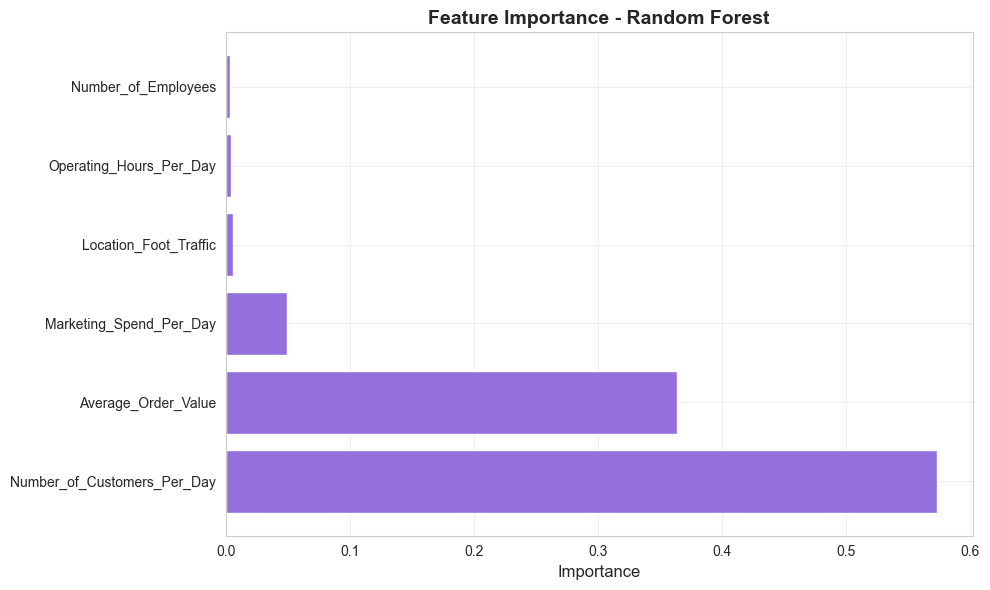

In [38]:
# Get feature importance (for tree-based models)
if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    importances = best_model.feature_importances_
    feature_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance:")
    print("="*60)
    for i, row in feature_imp.iterrows():
        bar_length = int(row['Importance'] * 50)
        bar = '█' * bar_length
        print(f"{row['Feature']:<35} {bar} {row['Importance']:.4f}")
    
    # Save feature importance
    feature_imp.to_csv('results/feature_importance.csv', index=False)
    print("\n✓ Feature importance saved to results/feature_importance.csv")
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color='mediumpurple')
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 11. Model Evaluation Visualizations

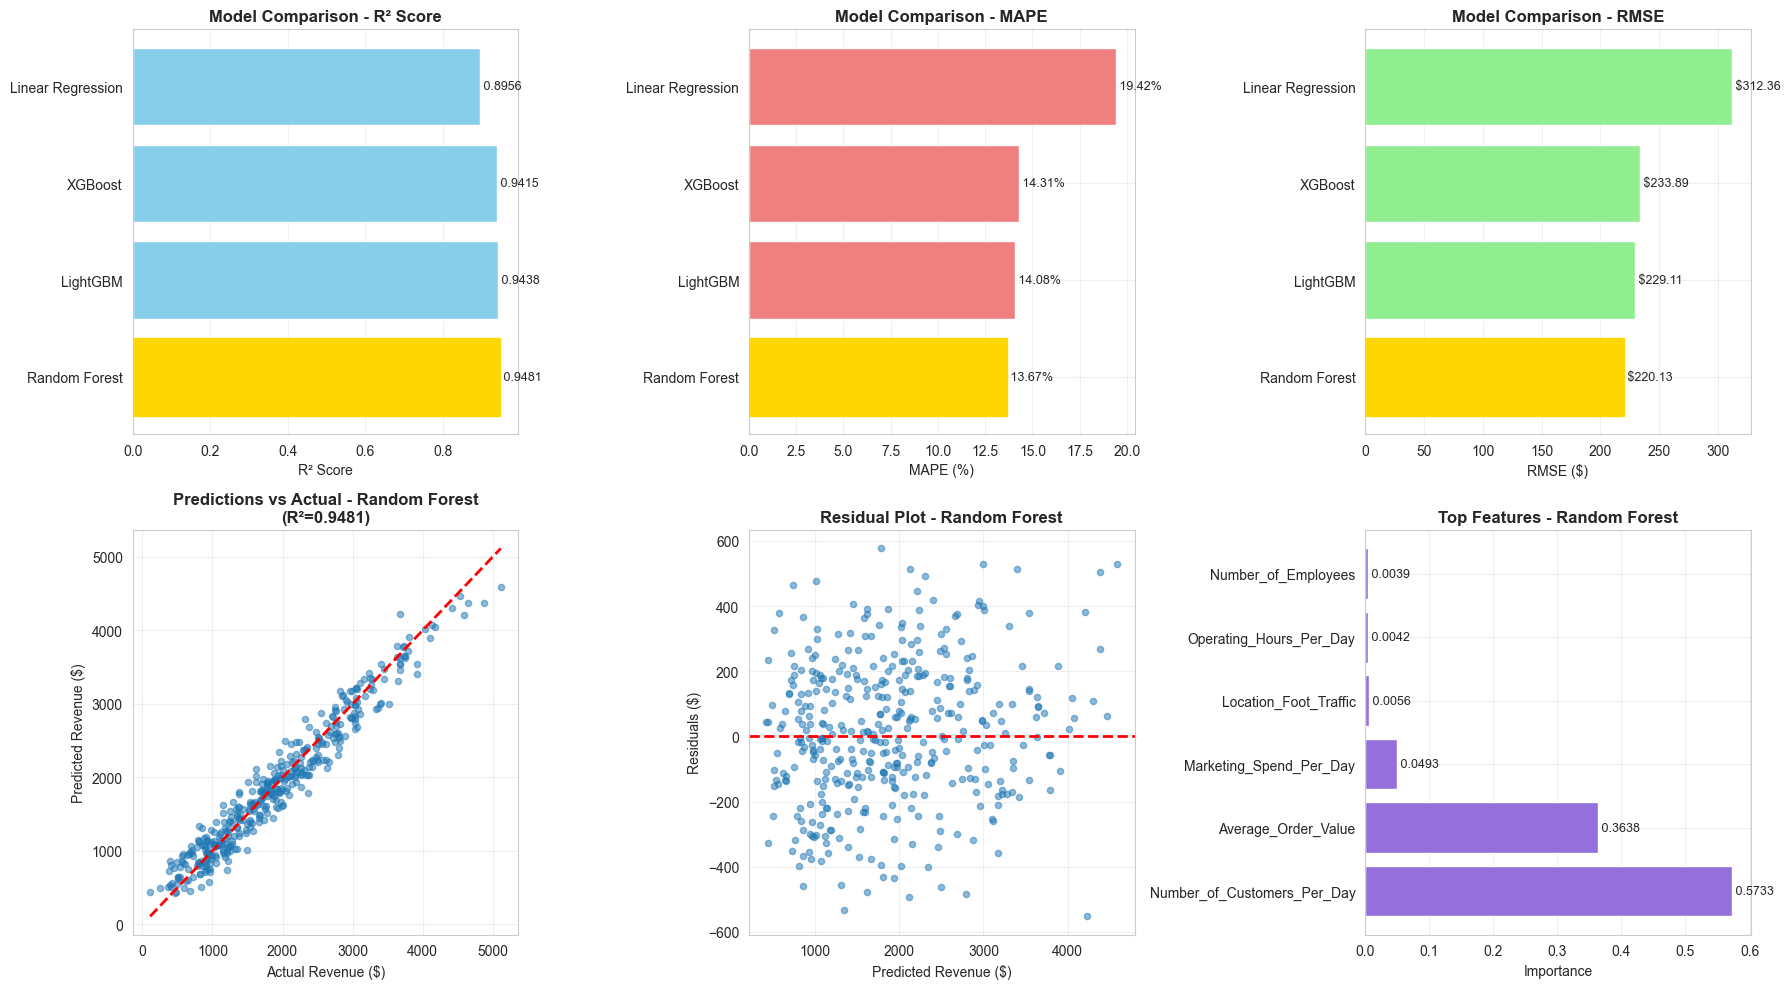

✓ Model evaluation visualizations created


In [39]:
# Get predictions from best model
if best_model_name == 'Linear Regression':
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

# Create evaluation plots
fig = plt.figure(figsize=(18, 10))

# 1. Model Comparison - R²
ax1 = plt.subplot(2, 3, 1)
bars = ax1.barh(results['Model'], results['R2'], color='skyblue')
bars[0].set_color('gold')
ax1.set_xlabel('R² Score')
ax1.set_title('Model Comparison - R² Score', fontweight='bold', fontsize=12)
for i, v in enumerate(results['R2']):
    ax1.text(v, i, f' {v:.4f}', va='center', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Model Comparison - MAPE
ax2 = plt.subplot(2, 3, 2)
bars = ax2.barh(results['Model'], results['MAPE'], color='lightcoral')
bars[results['MAPE'].argmin()].set_color('gold')
ax2.set_xlabel('MAPE (%)')
ax2.set_title('Model Comparison - MAPE', fontweight='bold', fontsize=12)
for i, v in enumerate(results['MAPE']):
    ax2.text(v, i, f' {v:.2f}%', va='center', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Model Comparison - RMSE
ax3 = plt.subplot(2, 3, 3)
bars = ax3.barh(results['Model'], results['RMSE'], color='lightgreen')
bars[results['RMSE'].argmin()].set_color('gold')
ax3.set_xlabel('RMSE ($)')
ax3.set_title('Model Comparison - RMSE', fontweight='bold', fontsize=12)
for i, v in enumerate(results['RMSE']):
    ax3.text(v, i, f' ${v:.2f}', va='center', fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. Predictions vs Actual
ax4 = plt.subplot(2, 3, 4)
ax4.scatter(y_test, y_pred_best, alpha=0.5, s=20)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax4.set_xlabel('Actual Revenue ($)')
ax4.set_ylabel('Predicted Revenue ($)')
ax4.set_title(f'Predictions vs Actual - {best_model_name}\n(R²={results.iloc[0]["R2"]:.4f})',
              fontweight='bold', fontsize=12)
ax4.grid(True, alpha=0.3)

# 5. Residual Plot
ax5 = plt.subplot(2, 3, 5)
residuals = y_test - y_pred_best
ax5.scatter(y_pred_best, residuals, alpha=0.5, s=20)
ax5.axhline(y=0, color='r', linestyle='--', lw=2)
ax5.set_xlabel('Predicted Revenue ($)')
ax5.set_ylabel('Residuals ($)')
ax5.set_title(f'Residual Plot - {best_model_name}', fontweight='bold', fontsize=12)
ax5.grid(True, alpha=0.3)

# 6. Feature Importance
ax6 = plt.subplot(2, 3, 6)
if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    top_features = feature_imp.head(6)
    bars = ax6.barh(top_features['Feature'], top_features['Importance'], color='mediumpurple')
    ax6.set_xlabel('Importance')
    ax6.set_title(f'Top Features - {best_model_name}', fontweight='bold', fontsize=12)
    for i, v in enumerate(top_features['Importance']):
        ax6.text(v, i, f' {v:.4f}', va='center', fontsize=9)
    ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/model_evaluation.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Model evaluation visualizations created")

## 12. Making Predictions

### 12.1 Single Prediction Example

In [40]:
# Create example input
example_data = pd.DataFrame({
    'Number_of_Customers_Per_Day': [300],
    'Average_Order_Value': [7.5],
    'Operating_Hours_Per_Day': [12],
    'Number_of_Employees': [8],
    'Marketing_Spend_Per_Day': [250.0],
    'Location_Foot_Traffic': [600]
})

print("Example Input:")
print(example_data.T)

# Make prediction
prediction = best_model.predict(example_data)[0]

print(f"\n💰 Predicted Daily Revenue: ${prediction:,.2f}")

Example Input:
                                 0
Number_of_Customers_Per_Day  300.0
Average_Order_Value            7.5
Operating_Hours_Per_Day       12.0
Number_of_Employees            8.0
Marketing_Spend_Per_Day      250.0
Location_Foot_Traffic        600.0

💰 Predicted Daily Revenue: $2,210.67


### 12.2 Batch Prediction Template

In [41]:
# Template for batch predictions
print("""To make batch predictions:

1. Create a CSV with these columns:
   - Number_of_Customers_Per_Day
   - Average_Order_Value
   - Operating_Hours_Per_Day
   - Number_of_Employees
   - Marketing_Spend_Per_Day
   - Location_Foot_Traffic

2. Load and predict:
""")

code = '''import pandas as pd
import pickle

# Load model
with open('models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load your data
df = pd.read_csv('your_data.csv')

# Make predictions
predictions = model.predict(df)

# Add to dataframe
df['Predicted_Revenue'] = predictions

# Save
df.to_csv('predictions.csv', index=False)
'''

print(code)

To make batch predictions:

1. Create a CSV with these columns:
   - Number_of_Customers_Per_Day
   - Average_Order_Value
   - Operating_Hours_Per_Day
   - Number_of_Employees
   - Marketing_Spend_Per_Day
   - Location_Foot_Traffic

2. Load and predict:

import pandas as pd
import pickle

# Load model
with open('models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load your data
df = pd.read_csv('your_data.csv')

# Make predictions
predictions = model.predict(df)

# Add to dataframe
df['Predicted_Revenue'] = predictions

# Save
df.to_csv('predictions.csv', index=False)



## 13. Summary & Conclusions

In [42]:
print("="*80)
print("PROJECT SUMMARY")
print("="*80)

print(f"\n📊 Dataset:")
print(f"   Total samples: {len(df):,}")
print(f"   Features: {len(feature_names)}")
print(f"   Target: Daily_Revenue")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   R² Score:  {results.iloc[0]['R2']:.4f}")
print(f"   MAPE:      {results.iloc[0]['MAPE']:.2f}%")
print(f"   RMSE:      ${results.iloc[0]['RMSE']:.2f}")
print(f"   MAE:       ${results.iloc[0]['MAE']:.2f}")

if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    print(f"\n⭐ Top 3 Most Important Features:")
    for i, row in feature_imp.head(3).iterrows():
        print(f"   {row['Feature']}: {row['Importance']*100:.2f}%")

print(f"\n📁 Generated Files:")
print(f"   - models/best_model.pkl")
print(f"   - models/model_info.pkl")
print(f"   - models/scaler.pkl")
print(f"   - results/model_comparison.csv")
print(f"   - results/feature_importance.csv")
print(f"   - results/eda_comprehensive.png")
print(f"   - results/model_evaluation.png")

print("\n" + "="*80)
print("✓ ANALYSIS COMPLETE - MODEL READY FOR PRODUCTION")
print("="*80)

PROJECT SUMMARY

📊 Dataset:
   Total samples: 2,000
   Features: 6
   Target: Daily_Revenue

🏆 Best Model: Random Forest
   R² Score:  0.9481
   MAPE:      13.67%
   RMSE:      $220.13
   MAE:       $178.11

⭐ Top 3 Most Important Features:
   Number_of_Customers_Per_Day: 57.33%
   Average_Order_Value: 36.38%
   Marketing_Spend_Per_Day: 4.93%

📁 Generated Files:
   - models/best_model.pkl
   - models/model_info.pkl
   - models/scaler.pkl
   - results/model_comparison.csv
   - results/feature_importance.csv
   - results/eda_comprehensive.png
   - results/model_evaluation.png

✓ ANALYSIS COMPLETE - MODEL READY FOR PRODUCTION
